In [1]:
import pandas as pd 
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 
import json
import seaborn as sns

mpl.style.use('ggplot')

In [2]:
#read the date
train = pd.read_csv('./data/train.csv',engine ='python', error_bad_lines=False ,parse_dates=['date'],warn_bad_lines =False)


In [3]:
#copy there col
grp_1= train[['fullVisitorId','totals','date']].copy()

In [4]:
#json col load
d_t= pd.io.json.json_normalize(grp_1.totals.apply(json.loads))


In [5]:
#join the total json col in grp_1 df
grp_1=grp_1.join(d_t.apply(pd.Series))

In [6]:
#final dataset target
df=grp_1[['fullVisitorId','transactionRevenue','date']].copy()

In [7]:
#show dataset target
df.head()

,fullVisitorId,transactionRevenue,date
0,1131660440785968503,NaN,2016-09-02
1,377306020877927890,NaN,2016-09-02
2,3895546263509774583,NaN,2016-09-02
3,4763447161404445595,NaN,2016-09-02
4,27294437909732085,NaN,2016-09-02


In [8]:
# rename col  transactionRevenue to revenue.
df.rename(columns={'transactionRevenue':'revenue'},inplace=True)

In [9]:
# rename col  fullVisitorId to ID.
df.rename(columns={'fullVisitorId':'ID'},inplace=True)

In [10]:
df.columns

Index(['ID', 'revenue', 'date'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421729 entries, 0 to 421728
Data columns (total 3 columns):
ID         421729 non-null object
revenue    5383 non-null object
date       421729 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 9.7+ MB


In [12]:
#change datatype revenue to float 
# null values to zero because mean customer doesn't buy.
df['revenue'].fillna(0,inplace=True)
df['revenue']=df['revenue'].astype(float)

In [13]:
# unquien values in fullVisitorId
print('unique for fullid: ',str(len(df['ID'].unique().tolist())))
print('all fullid: ',str(len(df['ID'])))
print('num between all , unique : ',str(len(df['ID'])-len(df['ID'].unique().tolist())))

#fullId reapted 
#let's look duplicated

unique for fullid:  354456
all fullid:  421729
num between all , unique :  67273


In [14]:
#duplicated
df.duplicated().unique().tolist()
# use keep first  true mean find duplicated 

[False, True]

In [15]:
#drop_dauplicate
df.drop_duplicates(inplace=True)

In [16]:
#info after drop duplicate
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391908 entries, 0 to 421728
Data columns (total 3 columns):
ID         391908 non-null object
revenue    391908 non-null float64
date       391908 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.0+ MB


In [17]:
# unquien values in fullVisitorId after drop duplicate
print('unique for fullid: ',str(len(df['ID'].unique().tolist())))
print('all fullid: ',str(len(df['ID'])))
print('num between all , unique : ',str(len(df['ID'])-len(df['ID'].unique().tolist())))


unique for fullid:  354456
all fullid:  391908
num between all , unique :  37452


In [18]:
# df.sort_values(by='ID')

In [19]:
# df.groupby('ID').sum()

In [20]:
#month from date year
df['month']=df['date'].dt.strftime('%m-%d')


In [21]:
df.head()

,ID,revenue,date,month
0,1131660440785968503,0.0,2016-09-02,09-02
1,377306020877927890,0.0,2016-09-02,09-02
2,3895546263509774583,0.0,2016-09-02,09-02
3,4763447161404445595,0.0,2016-09-02,09-02
4,27294437909732085,0.0,2016-09-02,09-02


In [22]:
len(df['month'].unique())

166

In [23]:
#group by ID , Month
df_train =df.groupby(['ID','month']).sum()

In [24]:
df_train.head()

,,revenue
ID,month,
0000010278554503158,10-20,0.0
0000020424342248747,11-30,0.0
000005103959234087,08-21,0.0
0000068403966359845,04-03,0.0
0000093957001069502,09-27,0.0


In [25]:
df_train.reset_index(inplace=True)

Text(0.5,1,'Revenue by Month and ID')

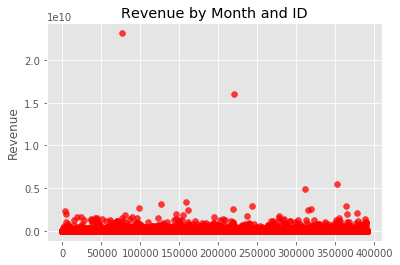

In [49]:
plt.scatter(df_train.index,df_train['revenue'], c='r',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue by Month and ID')

### Graph shows sum Revenue for all IDs across months 

In [27]:
df_values=df_train.loc[df_train['revenue']> 0]

Text(0.5,1,'"Revenue greater than 0" by Month and ID')

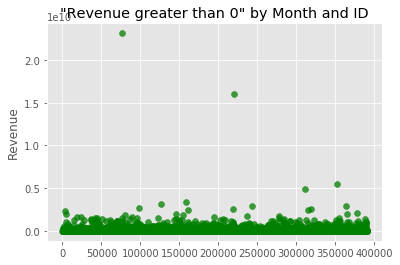

In [48]:
plt.scatter(df_values.index,df_values['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('"Revenue greater than 0" by Month and ID')

### Graph shows sum Revenue " gearter than zero" for all IDs across months 

In [29]:
df_ID =df.groupby(['ID',]).sum()

In [30]:
df_ID.reset_index(inplace=True)

In [31]:
df_month =df.groupby(['month']).sum()

In [32]:
df_month.reset_index(inplace=True)

Text(0.5,1,'Revenue by ID')

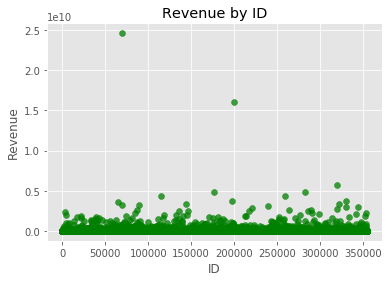

In [47]:
plt.scatter(df_ID.index,df_ID['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.xlabel('ID')
plt.title('Revenue by ID')

### Graph shows sum Revenue for all IDs (relationship between ID - sum revenue)


### All Graph above show revenue from 0- to .5 , have extreme values

Text(0.5,1,'Revenue daily')

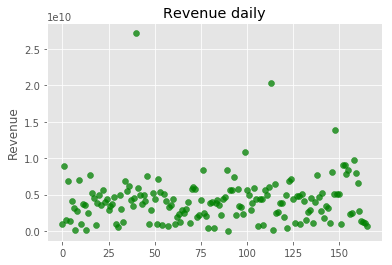

In [42]:
plt.scatter(df_month.index,df_month['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue daily')
# a = [0.0,.30,.60,.90,.120,.150,.180,.210,.240,.270,.300,.330]
# b = [i+2 for i in a]

# Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
# plt.xticks(b, Month_name)


In [35]:
date=df.groupby(['date']).sum()

In [36]:
date.head()

,revenue
date,
2016-08-03,0.000000e+00
2016-08-05,5.594260e+09
2016-08-09,5.596400e+09
2016-08-11,7.427120e+09
2016-08-13,2.198710e+09


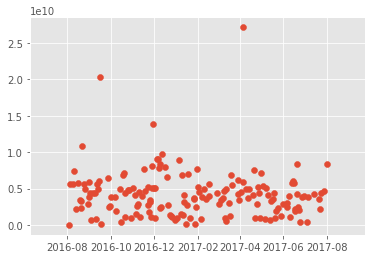

In [37]:
plt.scatter(date.index,date['revenue'])


In [38]:
ID=df.groupby(['ID']).sum()

In [39]:
# plt.plot(ID.index,ID['revenue'])
